In [158]:
import numpy as np
from pyproj import CRS
from pysheds.grid import Grid
from osgeo import gdal
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [159]:
# function for plotting maps
def plotFigure(data, label, cmap = 'Blues'):
    plt.figure(figsize=(12,12))
    plt.imshow(data, extent=grid.extent, cmap=cmap)
    plt.colorbar(label = label)
    plt.grid()

In [185]:
# specify pour point
x, y = -645464, 985529 # arbitrary, trying to get catchment to work for any pour point ... 

In [139]:
# set bounding box
# xmin, xmax = np.rint(x-20), np.rint(x+20)
# ymin, ymax = np.rint(y-20), np.rint(y+20)

In [161]:
# define direction map
dirmap = (64, 128, 1, 2, 4, 8, 16, 32)

In [141]:
# Import global water table elevation raster
# wt_dem = gdal.Open('D:/!! Geodatabase/Groundwater/Fan_depthtowatertable/Processed/WT_elevation.tif')

In [142]:
# Crop global elevation raster to bounding box around pour point and import and pysheds.grid object
# gdal.Translate('D:/!! Geodatabase/Groundwater/Groundwatersheds/Temp-DWTM/temp_clip.tif', wt_dem, projWin = [xmin, ymax, xmax, ymin])
# grid = Grid.from_raster('D:/!! Geodatabase/Groundwater/Groundwatersheds/Temp-DWTM/temp_clip.tif', data_name = 'dem')

In [220]:
# Import DEM
grid = Grid.from_raster('D:/!! Geodatabase/Groundwater/Groundwatersheds/Temp-DWTM/temp_clip_reproject.tif', data_name = 'dem')

In [221]:
grid.extent

(-2621635.4285, 1759226.419357439, -2847535.3956574462, 1949162.4922)

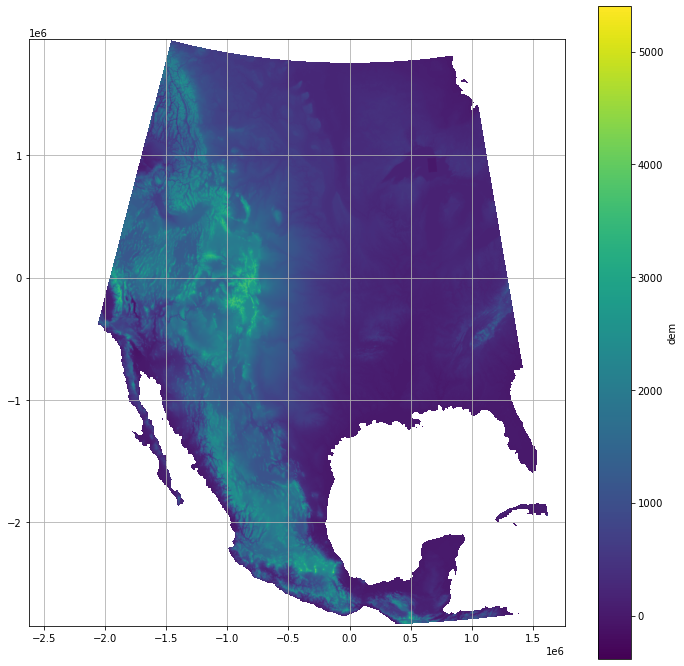

In [222]:
plotFigure(grid.dem, 'dem', 'viridis')

In [223]:
# grid.fill_depressions('dem', out_name='flooded_dem')
# grid.resolve_flats('flooded_dem', out_name='inflated_dem')

In [224]:
grid.flowdir('dem', out_name='dir', dirmap=dirmap) # ive tried filling sinks & fixing flats - doesn't make a difference

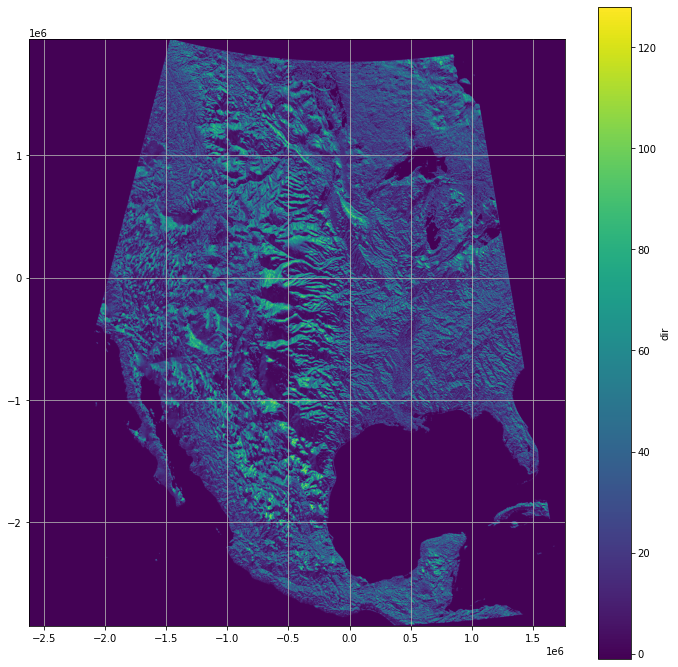

In [225]:
plotFigure(grid.dir, 'dir', 'viridis')

In [226]:
grid.accumulation(data='dir', dirmap=dirmap, out_name='acc', apply_mask=False)

In [227]:
grid.acc.extent

(-2621635.4285, 1759226.419357439, -2847535.3956574462, 1949162.4922)

In [228]:
# snap pour points to higher accumulation cells (w/ acc > 50)
xy = np.column_stack([x, y])
new_xy = grid.snap_to_mask(grid.acc > 10000, xy, return_dist=False)
new_x, new_y = new_xy[:,0], new_xy[:,1]

In [229]:
new_x, new_y

(array([-430787.83519256]), array([-380019.33486073]))

In [230]:
grid.catchment(data='dir', x=new_x, y=new_y, dirmap=dirmap, out_name='catch',
               recursionlimit=15000, xytype='label')

In [231]:
grid.clip_to('catch')
#plt.imshow(grid.view('catch'))
grid.view('catch')

Raster([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

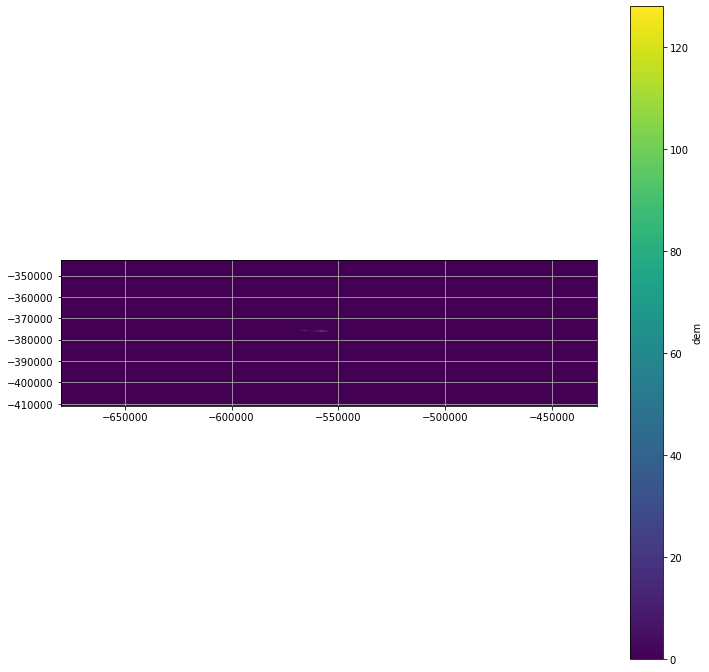

In [232]:
plotFigure(grid.catch, label = 'dem', cmap = 'viridis')